# Spotify for Developers

1. Go to https://developer.spotify.com/ then click on `DASHBOARD`

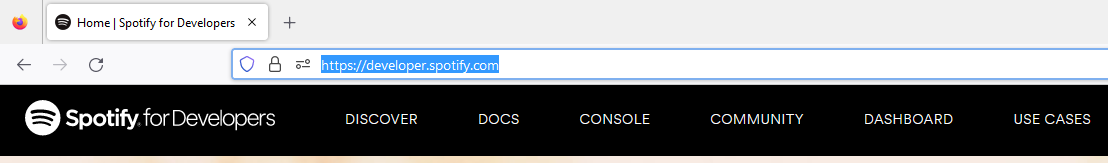

2. Accept the Terms and Conditions

3. Click on `CREATE AN APP`

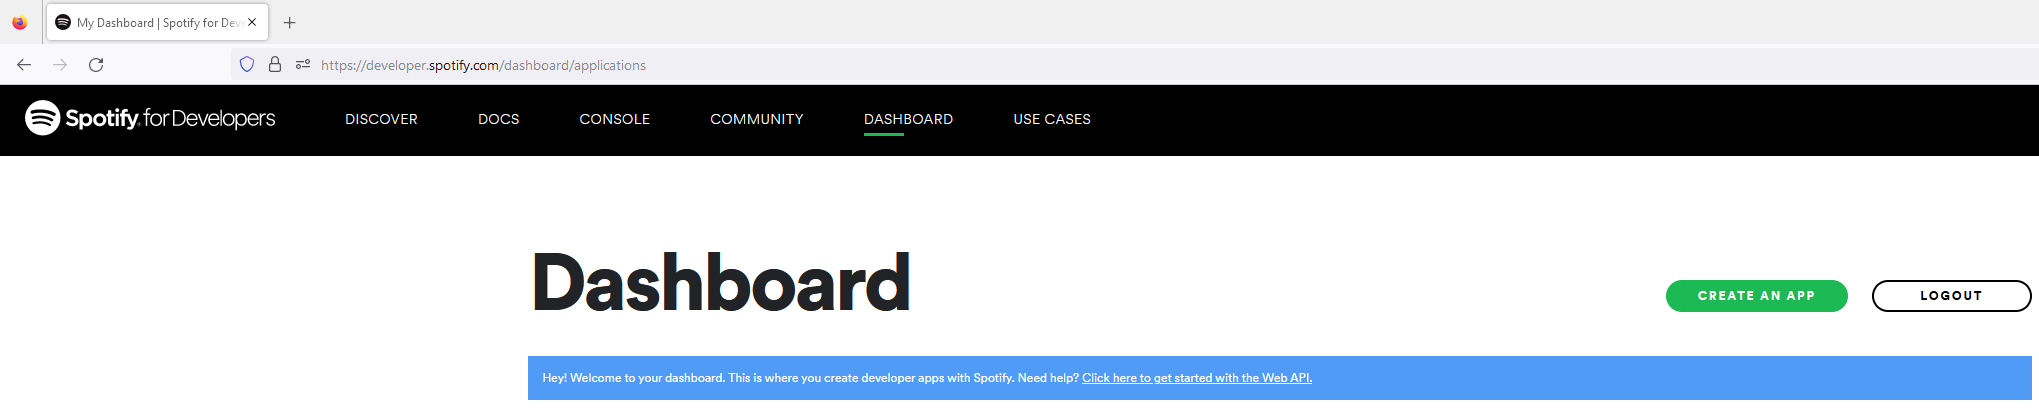

4. Fill in the App form

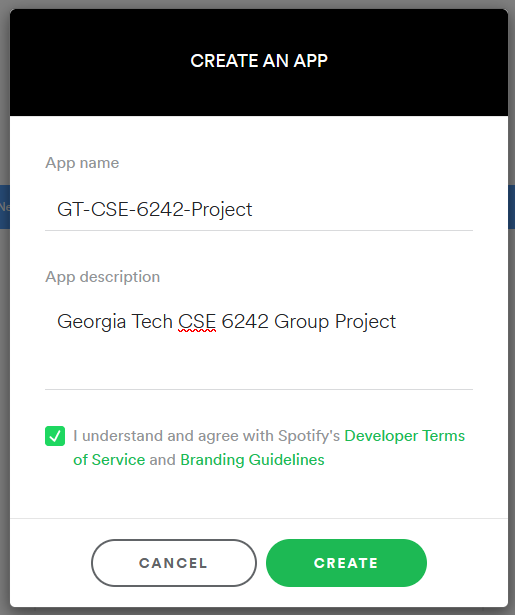

5. Copy the `Client ID` and `Client Secret`

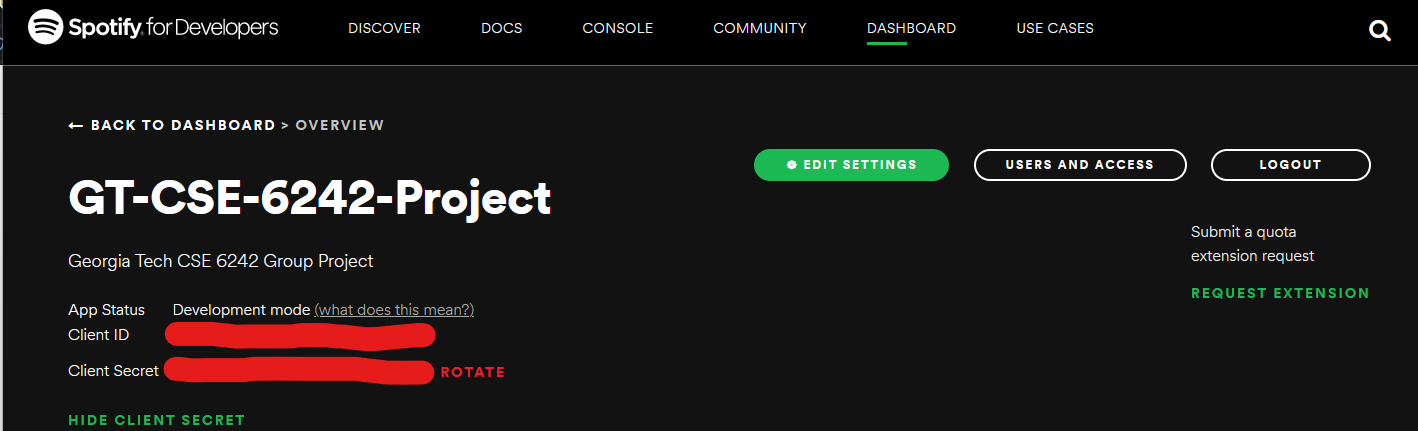

6. Set your environment variables.

In [1]:
import os
os.environ["SPOTIPY_CLIENT_ID"] = ""
os.environ["SPOTIPY_CLIENT_SECRET"] = ""

# Playing around with the API

The [spotipy](https://spotipy.readthedocs.io/en/2.22.1/) documents are very thorough!

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
# This is now our connection
spotify = spotipy.Spotify(auth_manager=SpotifyClientCredentials())

## Get an Artist Info

In [4]:
results = spotify.search(q="artist:" + "red hot chili peppers", type='artist')

In [5]:
import pandas as pd

In [6]:
df = pd.DataFrame.from_dict(results["artists"]["items"])
df

,external_urls,followers,genres,href,id,images,name,popularity,type,uri
0,{'spotify': 'https://open.spotify.com/artist/0...,"{'href': None, 'total': 19246812}","[alternative rock, funk metal, funk rock, perm...",https://api.spotify.com/v1/artists/0L8ExT028jH...,0L8ExT028jH3ddEcZwqJJ5,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Red Hot Chili Peppers,85,artist,spotify:artist:0L8ExT028jH3ddEcZwqJJ5
1,{'spotify': 'https://open.spotify.com/artist/4...,"{'href': None, 'total': 1275}",[tribute],https://api.spotify.com/v1/artists/4St65YtRYE8...,4St65YtRYE8w73lrc1GNKM,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Red Hot Chili Peppers Tribute Band,6,artist,spotify:artist:4St65YtRYE8w73lrc1GNKM
2,{'spotify': 'https://open.spotify.com/artist/5...,"{'href': None, 'total': 32}",[],https://api.spotify.com/v1/artists/5UW0S2FPTD5...,5UW0S2FPTD5GtlAJTzcwbh,[],Karaoke - Red Hot Chili Peppers,0,artist,spotify:artist:5UW0S2FPTD5GtlAJTzcwbh


In [7]:
from matplotlib import pyplot as plt
from PIL import Image
import urllib.request

<IPython.core.display.Javascript object>


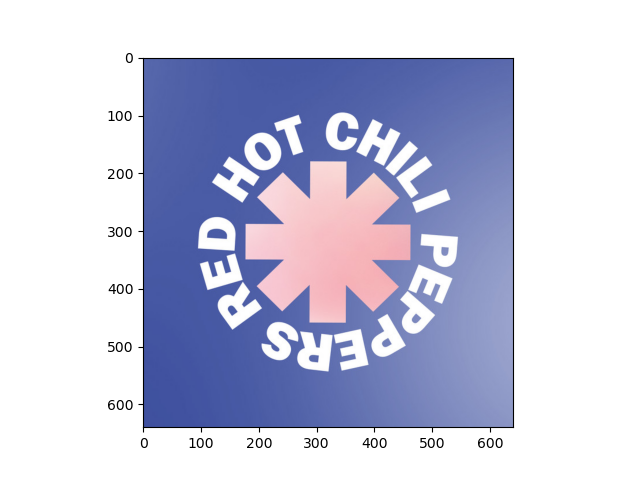

In [8]:
%matplotlib notebook
urllib.request.urlretrieve(df.iloc[0]["images"][0]["url"], "temp.png")
im = Image.open("temp.png", "r")
plt.imshow(im)

In [21]:
artist_name = df.iloc[0]["name"]
artist_uri = df.iloc[0]["uri"]
artist = spotify.artist(artist_uri)

## Album Info for the Artist

In [61]:
df_albums = pd.DataFrame.from_dict(spotify.artist_albums(df.iloc[0]["id"]))
df_albums

,href,items,limit,next,offset,previous,total
0,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
1,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
2,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
3,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
4,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
5,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
6,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
7,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
8,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446
9,https://api.spotify.com/v1/artists/0L8ExT028jH...,"{'album_group': 'album', 'album_type': 'album'...",20,https://api.spotify.com/v1/artists/0L8ExT028jH...,0,None,446


## All the Tracks on Spotify for the Artist

In [59]:
tracks_dict_list = []

for i in range(len(df_albums)):
    df_album_tracks = pd.DataFrame.from_dict(spotify.album_tracks(df_albums.iloc[i]["items"]["id"]))
    for j in range(len(df_album_tracks)):
        track_dict = {
            "artist": df_albums.iloc[i]["items"]["artists"][0]["name"],
            "artist_id": df_albums.iloc[i]["items"]["artists"][0]["id"],
            "album": df_albums.iloc[i]["items"]["name"],
            "album_id": df_albums.iloc[i]["items"]["id"],
            "track": df_album_tracks.iloc[j]["items"]["name"],
            "track_id": df_album_tracks.iloc[j]["items"]["id"],
        }
        tracks_dict_list.append(track_dict)
        
df_tracks = pd.DataFrame.from_dict(tracks_dict_list)

In [60]:
df_tracks

,artist,artist_id,album,album_id,track,track_id
0,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Tippa My Tongue,7BCxIjRsqbc9Yiy2haBCIK
1,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Peace and Love,3W2reBya7FkjHCP1B2nmQr
2,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Reach Out,00B7SBwrjbycLMOgAmeIU8
3,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Eddie,0G1BEi8ByngMCJqcPnDACw
4,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Fake as Fu@k,7cpC2EuFMexgy392K13RZb
...,...,...,...,...,...,...
319,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,5QxFTj8ar3blXVyVEo2rxD,Police Helicopter - Demo Version,5dikqj9yWSRUhLkXMXmuqU
320,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,5QxFTj8ar3blXVyVEo2rxD,Out In L.A. - Demo Version,1SVTZJAXslouRaIsxmdUz7
321,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,5QxFTj8ar3blXVyVEo2rxD,Green Heaven - Demo Version,5LyAZwfPA9QtsoQgCrZhXE
322,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,5QxFTj8ar3blXVyVEo2rxD,What It Is (AKA Nina's Song) - Demo Version,2yqPd7tLYAN0V4rzUIRUxh


## Get Track Info comparable to Metadata for MSD

In [106]:
audio_features_cols = ["danceability", "energy", "key", "loudness"]
def get_audio_features(x):
    return pd.Series(pd.DataFrame.from_dict(spotify.audio_features(x["track_id"]))[audio_features_cols].to_numpy().flatten().tolist())

In [112]:
df_tracks[audio_features_cols] = df_tracks.apply(lambda x: get_audio_features(x), axis=1)

In [113]:
df_tracks

,artist,artist_id,album,album_id,track,track_id,danceability,energy,key,loudness
0,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Tippa My Tongue,7BCxIjRsqbc9Yiy2haBCIK,0.573,0.913,5.0,-6.520
1,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Peace and Love,3W2reBya7FkjHCP1B2nmQr,0.680,0.679,10.0,-6.076
2,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Reach Out,00B7SBwrjbycLMOgAmeIU8,0.663,0.710,11.0,-5.550
3,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Eddie,0G1BEi8ByngMCJqcPnDACw,0.515,0.809,9.0,-5.817
4,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,Fake as Fu@k,7cpC2EuFMexgy392K13RZb,0.599,0.777,8.0,-6.037
...,...,...,...,...,...,...,...,...,...,...
319,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,5QxFTj8ar3blXVyVEo2rxD,Police Helicopter - Demo Version,5dikqj9yWSRUhLkXMXmuqU,0.477,0.935,11.0,-7.926
320,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,5QxFTj8ar3blXVyVEo2rxD,Out In L.A. - Demo Version,1SVTZJAXslouRaIsxmdUz7,0.587,0.963,11.0,-5.357
321,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,5QxFTj8ar3blXVyVEo2rxD,Green Heaven - Demo Version,5LyAZwfPA9QtsoQgCrZhXE,0.670,0.821,9.0,-6.761
322,Red Hot Chili Peppers,0L8ExT028jH3ddEcZwqJJ5,Red Hot Chili Peppers,5QxFTj8ar3blXVyVEo2rxD,What It Is (AKA Nina's Song) - Demo Version,2yqPd7tLYAN0V4rzUIRUxh,0.658,0.598,2.0,-12.971


## Get Track Info Comparable to the Array Information

In [134]:
import numpy as np
def get_audio_analysis(x):
    audio_analysis = spotify.audio_analysis(x["track_id"])
    pitches = []
    timbres = []
    for i in range(len(audio_analysis["segments"])):
        pitches.append(audio_analysis["segments"][i]["pitches"])
        timbres.append(audio_analysis["segments"][i]["timbre"])
        
    return pd.Series([np.array(pitches), np.array(timbres)])

In [139]:
audio_analysis_cols = ["pitches", "timbres"]
df_tracks[audio_analysis_cols] = df_tracks.apply(lambda x: get_audio_analysis(x), axis=1)

### Verify Pitches

In [140]:
pitches = {
    0: "C",
    1: "C#/Db",
    2: "D",
    3: "D#/Eb",
    4: "E",
    5: "F",
    6: "F#/Gb",
    7: "G",
    8: "G#/Ab",
    9: "A",
    10: "A#/Bb",
    11: "B"}

<IPython.core.display.Javascript object>


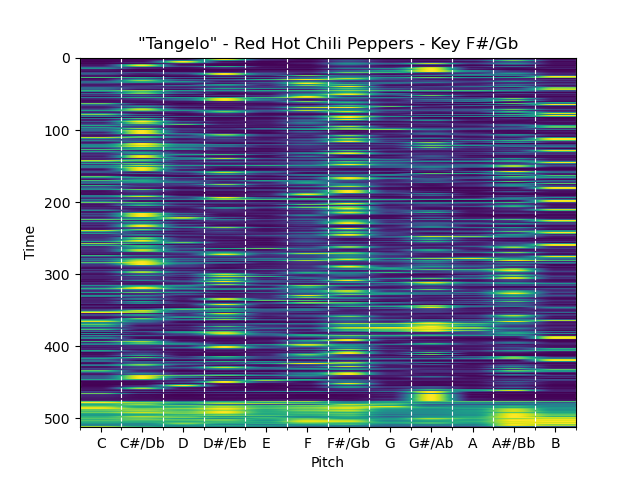

In [143]:
%matplotlib notebook

idx = 33

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.imshow(df_tracks.iloc[idx]["pitches"], aspect='auto')
plt.xlabel("Pitch")
plt.ylabel("Time")
plt.title("\"{}\" - {} - Key {}".format(df_tracks.iloc[idx]["track"],
                                        df_tracks.iloc[idx]["artist"],
                                        pitches[df_tracks.iloc[idx]["key"]]
                                       ))
plt.xticks([x for x in pitches.keys()], pitches.values())
ax.set_xticks(np.arange(0, 13) - 0.5, minor=True)
plt.grid(which='minor', color='w', linestyle='--')
plt.show()

<IPython.core.display.Javascript object>


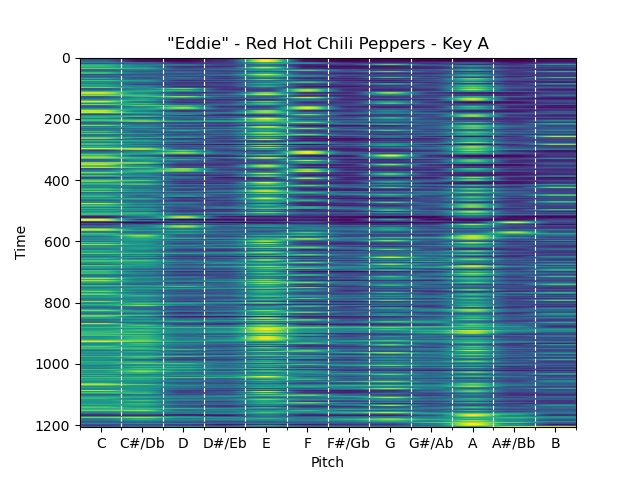

In [144]:
%matplotlib notebook

idx = 3

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.imshow(df_tracks.iloc[idx]["pitches"], aspect='auto')
plt.xlabel("Pitch")
plt.ylabel("Time")
plt.title("\"{}\" - {} - Key {}".format(df_tracks.iloc[idx]["track"],
                                        df_tracks.iloc[idx]["artist"],
                                        pitches[df_tracks.iloc[idx]["key"]]
                                       ))
plt.xticks([x for x in pitches.keys()], pitches.values())
ax.set_xticks(np.arange(0, 13) - 0.5, minor=True)
plt.grid(which='minor', color='w', linestyle='--')
plt.show()

## Save the DF

In [145]:
df_tracks.to_pickle("temp.pkl")